In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
bankfile = 'pattern_bank_omtf.npz'
#bankfile = '../test7/pattern_bank.20.npz'

with np.load(bankfile) as data:
  patterns_phi = data['patterns_phi']
  patterns_match = data['patterns_match']

In [3]:
nlayers = 16
layer_names = ['ME1/1', 'ME1/2', 'ME2', 'ME3', 'ME4', 
               'RE1', 'RE2', 'RE3', 'RE4', 
               'GE1/1', 'GE2/1', 'ME0',
               'MB1', 'MB2', 'MB3', 'MB4']
ordered_layer_names = ['MB1', 'MB2', 'MB3', 'MB4',
                       'ME0', 'GE1/1', 'ME1/1', 
                       'ME1/2', 'RE1',
                       'GE2/1', 'RE2', 'ME2',
                       'ME3', 'RE3',
                       'ME4', 'RE4']
assert(len(layer_names) == nlayers)
assert(len(ordered_layer_names) == nlayers)

nbinsx = 47
firstbinx = 23

ncols = 7
nrows = 9

### Make images

In [4]:
# Styling
plt.style.use('tdrstyle.mplstyle')

from matplotlib.colors import LinearSegmentedColormap
cdict = {
  'blue' : ((0.0, 0.0416, 0.0416), (0.365079, 1.0, 1.0), (1.0, 1.0, 1.0)),
  'green': ((0.0, 0.0, 0.0), (0.365079, 0.0, 0.0), (0.746032, 1.0, 1.0), (1.0, 1.0, 1.0)),
  'red'  : ((0.0, 0.0, 0.0), (0.746032, 0.0, 0.0), (1.0, 1.0, 1.0)),
}
blue_hot = LinearSegmentedColormap('blue_hot', cdict)

In [5]:
def doit():
  stripes = np.zeros((nlayers, nbinsx), dtype=np.float32)
  for i in xrange(nbinsx):
    stripes[:,i] = i % 2
  
  ax.imshow(stripes, origin='lower', interpolation='nearest', aspect='auto',
            cmap=plt.cm.gray)
  ax.imshow(img, origin='lower', interpolation='nearest', aspect='auto',
            cmap=cmap, vmin=-0.2, vmax=2.8, alpha=.9)
  ax.axis('off')

  for y in [3,6,8,11,13]:
    ax.plot([-0.5,-0.5+nbinsx], [0.5+y,0.5+y], '-', color='#FFFF99', alpha=.1, lw=1)
  ax.fill([-0.5+firstbinx,0.5+firstbinx,0.5+firstbinx,-0.5+firstbinx], [-0.5,-0.5,0.5+11,0.5+11], 
          fc='#FFFF99', ec='none', alpha=.1)
  ax.locator_params(tight=True, nbins=12)

In [6]:
def doit2():
  plt.axis('on')
  plt.grid('off')
  plt.xticks([0,8,16,23,30,38,46], [0,8,16,23,30,38,46], fontsize=9)
  plt.yticks(np.arange(len(ordered_layer_names)), ordered_layer_names, fontsize=9)

/cvmfs/cms.cern.ch/slc6_amd64_gcc700/external/py2-matplotlib/2.2.3-ikaegh/lib/python2.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


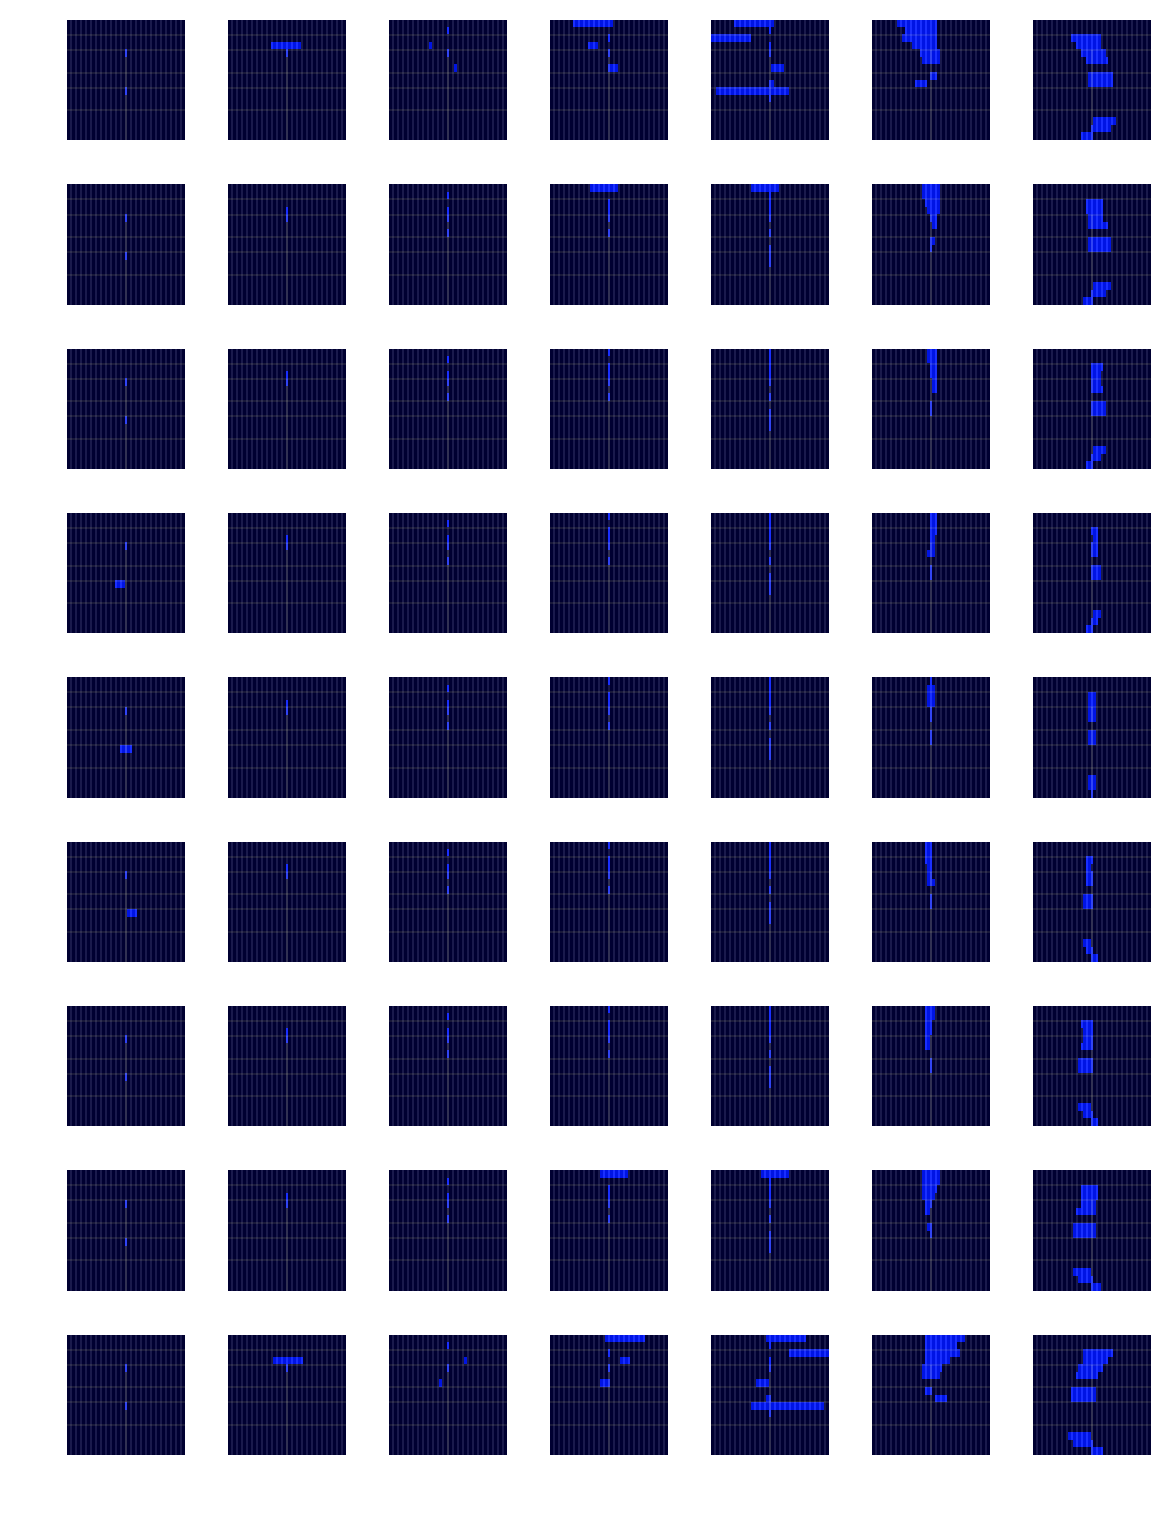

In [7]:
fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(8,8./ncols*nrows), tight_layout=True, sharex=True, sharey=True)

cmap = blue_hot

img1 = None

for i in xrange(nrows):
  for j in xrange(ncols):
    img = np.zeros((nlayers, nbinsx), dtype=np.float32)
    for k in xrange(nlayers):
      if (patterns_phi[:,j,k,:] == 0).all() and not (k == 2):  # skip invalid layers
        continue
      x0, x1 = patterns_phi[i,j,k,0], patterns_phi[i,j,k,2]
      s1 = slice(x0 + firstbinx, (x1 + 1) + firstbinx)  # offset by firstbinx
      k1 = ordered_layer_names.index(layer_names[k])
      img[k1,s1] = 1
      
    #if i == 0 and j == 3:  # zone 3, lowest pT
    #  img1 = img
      
    if i == 3 and j == 6:  # zone 6, second highest pT
      img1 = img
    
    ax = axs[i,j]
    doit()

plt.show()

/cvmfs/cms.cern.ch/slc6_amd64_gcc700/external/py2-matplotlib/2.2.3-ikaegh/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


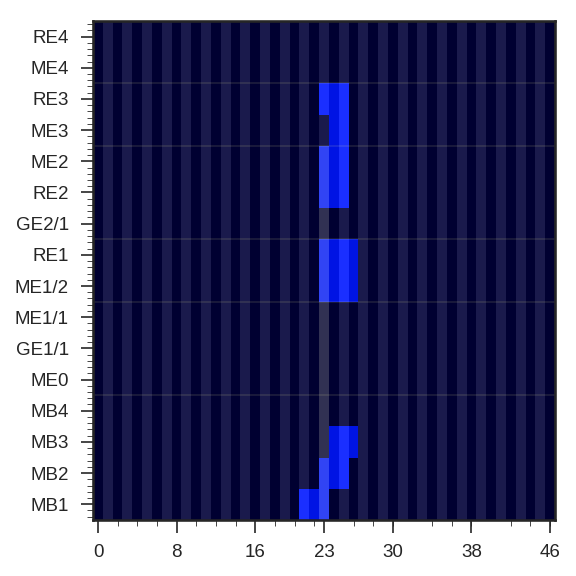

In [8]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(4,4), tight_layout=True, sharex=True, sharey=True)

img = img1
doit()
doit2()

plt.show()

In [ ]:
patterns_phi_emtf = np.zeros_like(patterns_phi, dtype=np.int32)

#data = [
#  [[15,15],[7,7],[7,7 ],[7,7 ]],
#  [[16,16],[7,7],[7,6 ],[7,6 ]],
#  [[14,14],[7,7],[8,7 ],[8,7 ]],
#  [[18,17],[7,7],[7,4 ],[7,4 ]],
#  [[13,12],[7,7],[10,7],[10,7]],
#  [[22,19],[7,7],[7,0 ],[7,0 ]],
#  [[11,8 ],[7,7],[14,7],[14,7]],
#  [[30,23],[7,7],[7,0 ],[7,0 ]],
#  [[7,0  ],[7,7],[14,7],[14,7]],
#]

data = [
  [[15,15],[7,7],[7,7 ],[7,7 ]],
  [[16,16],[7,7],[8,6 ],[8,6 ]],
  [[14,14],[7,7],[8,6 ],[8,6 ]],
  [[18,17],[7,7],[10,4],[10,4]],
  [[13,12],[7,7],[10,4],[10,4]],
  [[22,19],[7,7],[14,0],[14,0]],
  [[11,8 ],[7,7],[14,0],[14,0]],
  [[30,23],[7,7],[14,0],[14,0]],
  [[7,0  ],[7,7],[14,0],[14,0]],
]
data = np.asarray(data)
print patterns_phi_emtf.shape, data.shape

ind = [8,6,4,2,0,1,3,5,7]  # ordering according to ipt
data = data[ind]

# ME1/1
patterns_phi_emtf[:,:4,0,0] = data[:,0,1,np.newaxis] - 15
patterns_phi_emtf[:,:4,0,2] = data[:,0,0,np.newaxis] - 15

# ME1/2
patterns_phi_emtf[:,4:,1,0] = data[:,0,1,np.newaxis] - 15
patterns_phi_emtf[:,4:,1,2] = data[:,0,0,np.newaxis] - 15

# ME2
patterns_phi_emtf[:,:,2,0] = data[:,1,1,np.newaxis] - 7
patterns_phi_emtf[:,:,2,2] = data[:,1,0,np.newaxis] - 7

# ME3
patterns_phi_emtf[:,:,3,0] = data[:,2,1,np.newaxis] - 7
patterns_phi_emtf[:,:,3,2] = data[:,2,0,np.newaxis] - 7

# ME4
patterns_phi_emtf[:,:,4,0] = data[:,3,1,np.newaxis] - 7
patterns_phi_emtf[:,:,4,2] = data[:,3,0,np.newaxis] - 7

In [ ]:
fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(8,8./ncols*nrows), tight_layout=True, sharex=True, sharey=True)

cmap = plt.cm.hot

img1 = None

for i in xrange(nrows):
  for j in xrange(ncols):
    img = np.zeros((nlayers, nbinsx), dtype=np.float32)
    for k in xrange(nlayers):
      if (patterns_phi_emtf[:,j,k,:] == 0).all() and not (k == 2):  # skip invalid layers
        continue
      x0, x1 = patterns_phi_emtf[i,j,k,0], patterns_phi_emtf[i,j,k,2]
      s1 = slice(x0 + firstbinx, (x1 + 1) + firstbinx)  # offset by firstbinx
      k1 = ordered_layer_names.index(layer_names[k])
      img[k1,s1] = 1
      
    if i == 0 and j == 3:  # zone 3, lowest pT
      img1 = img
    
    ax = axs[i,j]
    doit()

plt.show()

In [ ]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(4,4), tight_layout=True, sharex=True, sharey=True)

img = img1  # zone 3, lowest pT
doit()
doit2()

plt.show()

### Table

In [ ]:
# Table, grouped by lay

import pandas as pd

ncols_minor = 3

patterns_phi_pd = patterns_phi.copy()
patterns_phi_pd = np.moveaxis(patterns_phi_pd, 2, 0)  # lay -> 1st column
patterns_phi_pd = patterns_phi_pd.reshape((nlayers*nrows,ncols*ncols_minor))

df_index = []
for i in xrange(nlayers):
  for j in xrange(nrows):
    s = '%i_%i' % (i,j)
    df_index.append(s)

df_columns = []
for i in xrange(ncols):
  for j in xrange(ncols_minor):
    s = '%i_%i' % (i,j)
    df_columns.append(s)

df = pd.DataFrame(patterns_phi_pd, index=df_index, columns=df_columns)

In [ ]:
def my_highlight(s):
    color = '#eeeeee'
    return 'background-color: %s' % color

df_columns_hl = [df_columns[x] for x in [0,1,2,6+0,6+1,6+2,12+0,12+1,12+2]]
df.style.applymap(my_highlight, subset=pd.IndexSlice[:, df_columns_hl])

In [ ]:
# Lookup

ipt = 6
ieta = 5

rows = ['%i_%i' % (i,ipt) for i in xrange(12)]
columns = ['%i_%i' % (ieta,j) for j in xrange(3)]
print df.loc[rows, columns]